# 工厂数据集基础模型预测结果探索性分析

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = [
    'Noto Sans CJK SC',
    'Noto Serif CJK SC',
    'WenQuanYi Zen Hei',
    'WenQuanYi Micro Hei',
    'SimHei', 'SimSun', 'FangSong'
]
plt.rcParams['axes.unicode_minus'] = False  

## 1. data load

In [2]:
train_dir = "/root/autodl-tmp/seat_dataset/chengdu_customer"
valid_dir = "/root/autodl-tmp/seat_dataset/chengdu_valid"
ann_file = "_annotations.coco.json"
cls_file = "_classification.coco.json"

In [3]:
def load_coco_file(root_dir, file_name):
    coco_fp = os.path.join(root_dir, file_name)
    with open(coco_fp, 'r', encoding='utf-8') as f:
        coco_data = json.load(f)
    for k in ('categories', 'images', 'annotations'):
        coco_data[k] = pd.DataFrame(coco_data[k])
    cat_df = coco_data['categories'][['id', 'name']]
    ann_df = coco_data['annotations']
    ann_df = ann_df.merge(cat_df, left_on='category_id', right_on='id', how='left')
    
    bbox_array = np.stack(ann_df['bbox'].values)
    ann_df['w'] = bbox_array[:, 2]
    ann_df['h'] = bbox_array[:, 3]
    ann_df['c_x'] = bbox_array[:, 0] + bbox_array[:, 2] / 2
    ann_df['c_y'] = bbox_array[:, 1] + bbox_array[:, 3] / 2

    # 根据 image_id 合并 images 信息
    img_df = coco_data['images']
    ann_df = ann_df.merge(img_df, left_on='image_id', right_on='id', how='left', suffixes=('', '_img'))

    coco_data['annotations'] = ann_df

    return coco_data

In [4]:
cls_train_coco = load_coco_file(train_dir, cls_file)
cls_valid_coco = load_coco_file(valid_dir, cls_file)

In [5]:
cls_train_coco['annotations']

,id_x,image_id,category_id,bbox,area,segmentation,transcription,iscrowd,source,score,...,c_y,id,license,file_name,height,width,date_captured,mask_null,interested_area,not_interested_area
0,0,0,8,"[567.4458536585366, 1574.4624390243903, 49.451...",2297.260971,[[]],NaN,0,gt,NaN,...,1597.689756,0,1,1756717183496__p_0002_f9f1d25c48db4b5086d68fa9...,2048.0,2046.0,n/a,False,[],[]
1,1,5,16,"[321.23926305138747, 971.2612906427289, 530.11...",164970.580057,[[]],NaN,0,gt,NaN,...,1126.859168,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[]
2,2,5,16,"[1047.7115977073206, 796.7067049410758, 161.04...",37464.305244,[[]],NaN,0,gt,NaN,...,913.019850,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[]
3,3,7,8,"[1324.499797198969, 1664.161499040115, 6.56030...",65.058604,[[]],NaN,0,gt,NaN,...,1669.120000,7,1,1756717181783__p_0031_4e002985ef7c4913a4524f7f...,2048.0,2046.0,n/a,False,[],[]
4,4,13,8,"[2994.802079555072, 1472.5003022609117, 579.97...",465749.661659,[[]],NaN,0,gt,NaN,...,1874.023697,13,1,1756717174529__p_0018_4ee0e4f8ef5444b599c374ec...,4100.0,4096.0,n/a,False,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,784,510,2,"[1095.830078125, 1785.29736328125, 1302.235839...",791204.937500,NaN,NaN,0,predict,0.269988,...,2089.084473,510,1,1756716879769_50cbd5ef-bc52-4406-9e4c-d76cb515...,4096.0,4096.0,n/a,False,[],[]
1140,785,511,8,"[2437.838134765625, 858.6640014648438, 79.3574...",15488.002930,NaN,NaN,0,predict,0.838007,...,956.247833,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[]
1141,786,511,16,"[2444.3544921875, 1338.9090576171875, 885.2868...",414046.687500,NaN,NaN,0,predict,0.582011,...,1572.757935,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[]
1142,787,511,16,"[2575.78125, 1664.7435302734375, 289.809814453...",61726.093750,NaN,NaN,0,predict,0.414127,...,1771.237671,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[]


In [6]:
def get_gt_annotations(coco_data):
    data = coco_data.copy()
    data['annotations'] = data['annotations'][data['annotations']['source'] == 'gt']
    return data

def get_predict_annotations(coco_data):
    data = coco_data.copy()
    data['annotations'] = data['annotations'][data['annotations']['source'] == 'predict']
    return data

ann_train_coco = get_gt_annotations(cls_train_coco)
ann_valid_coco = get_gt_annotations(cls_valid_coco)

## 2. Data Distribution

### 2.1 各类别占比

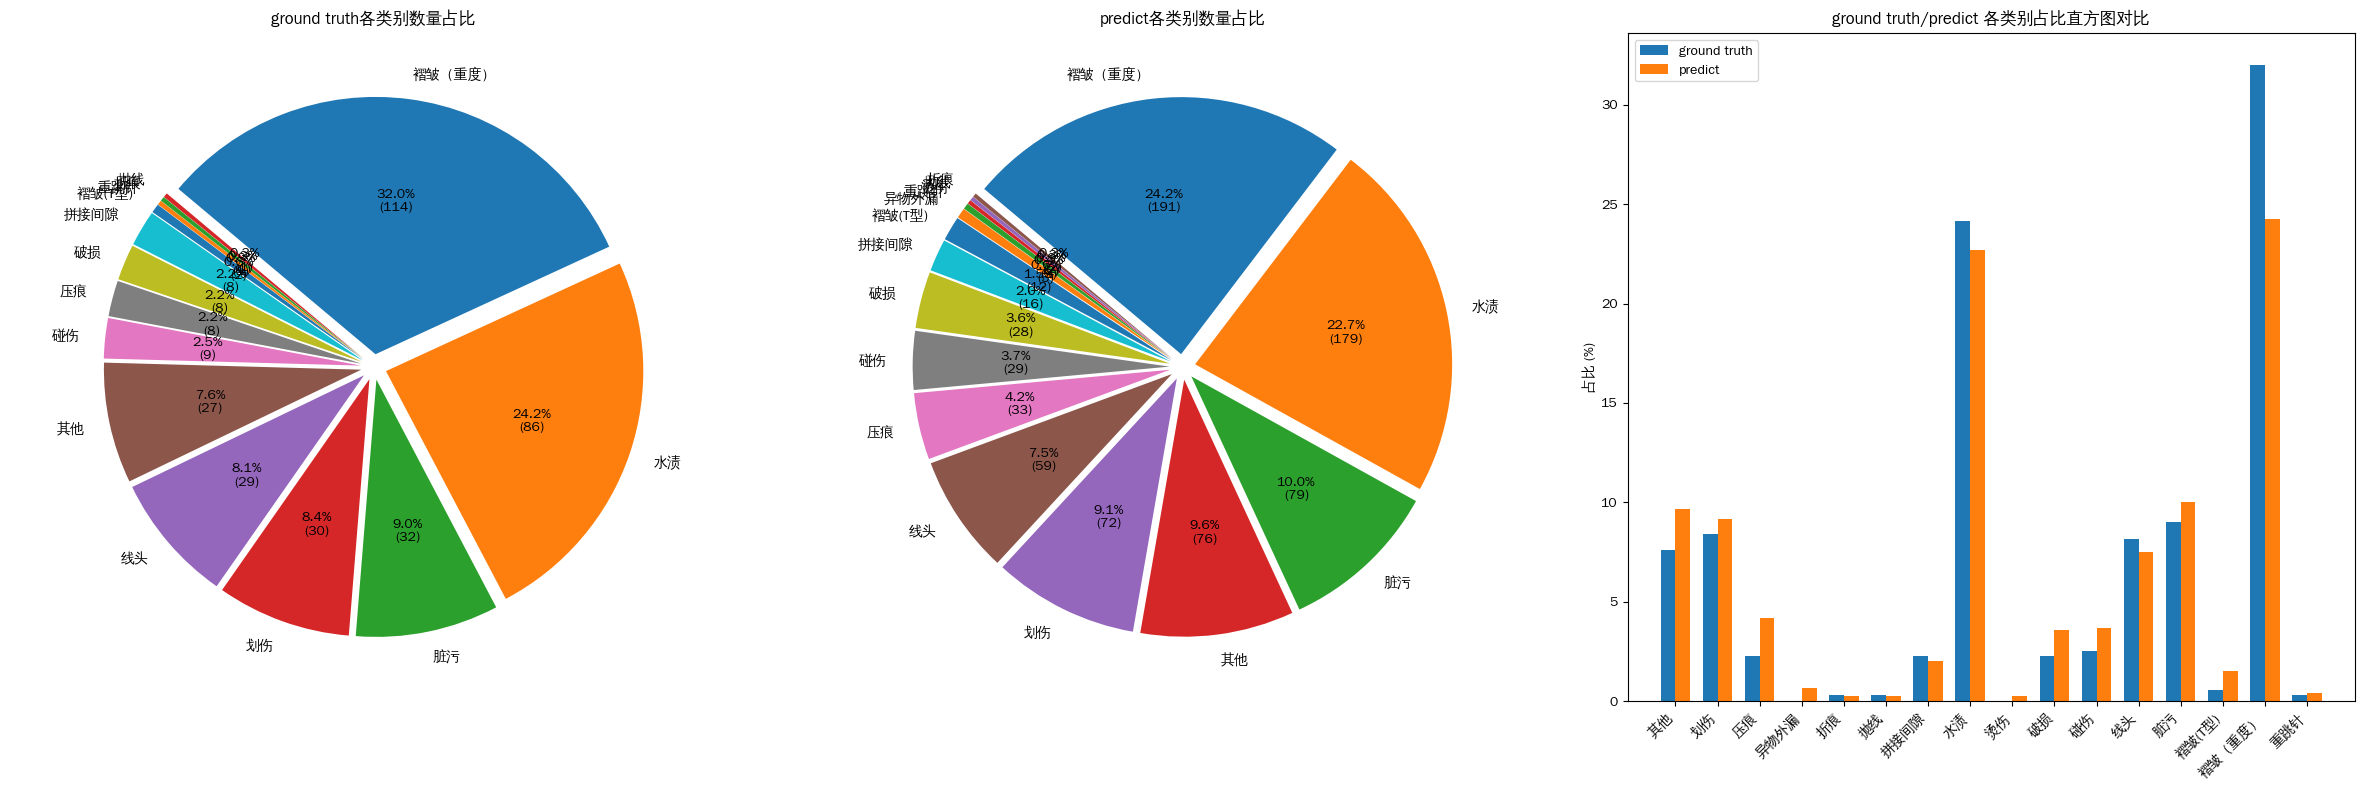

In [7]:
def plot_class_distribution(ann1, ann2, name1, name2):
    def get_count_df(ann):
        vc = ann['name'].value_counts()
        return pd.DataFrame({'数量': vc, '占比': 100 * vc / vc.sum()})

    df_train = get_count_df(ann1)
    df_valid = get_count_df(ann2)

    all_labels = sorted(set(df_train.index).union(df_valid.index))
    train_counts = df_train.reindex(all_labels, fill_value=0)['数量']
    valid_counts = df_valid.reindex(all_labels, fill_value=0)['数量']
    train_percents = df_train.reindex(all_labels, fill_value=0)['占比']
    valid_percents = df_valid.reindex(all_labels, fill_value=0)['占比']

    fig, axes = plt.subplots(1, 3, figsize=(24, 8))  
    # 训练集饼图
    labels = df_train.index.tolist()
    values = df_train['数量'].tolist()
    percents = df_train['占比'].tolist()
    # 拼接数量和百分比
    def autopct_func(pct, allvals):
        absolute = int(round(pct/100.*np.sum(allvals)))
        return '{:.1f}%\n({:d})'.format(pct, absolute)
    explode = [0.05] * len(labels) if len(labels) > 6 else None
    axes[0].pie(
        values,
        labels=labels,
        autopct=lambda pct: autopct_func(pct, values),
        startangle=140,
        counterclock=False,
        explode=explode,
        textprops={'fontsize': 10}
    )
    axes[0].set_title(f'{name1}各类别数量占比')
    axes[0].axis('equal')

    # 验证集饼图
    labels = df_valid.index.tolist()
    values = df_valid['数量'].tolist()
    percents = df_valid['占比'].tolist()
    explode = [0.05] * len(labels) if len(labels) > 6 else None
    axes[1].pie(
        values,
        labels=labels,
        autopct=lambda pct: autopct_func(pct, values),
        startangle=140,
        counterclock=False,
        explode=explode,
        textprops={'fontsize': 10}
    )
    axes[1].set_title(f'{name2}各类别数量占比')
    axes[1].axis('equal')

    # 直方图（百分比）
    x = np.arange(len(all_labels))
    width = 0.35
    axes[2].bar(x - width/2, train_percents, width, label=name1)
    axes[2].bar(x + width/2, valid_percents, width, label=name2)
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(all_labels, rotation=45, ha='right')
    axes[2].set_ylabel('占比 (%)')
    axes[2].set_title(f'{name1}/{name2} 各类别占比直方图对比')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# 调用函数
plot_class_distribution(get_gt_annotations(cls_train_coco)['annotations'], get_predict_annotations(cls_train_coco)['annotations'], 'ground truth', 'predict')

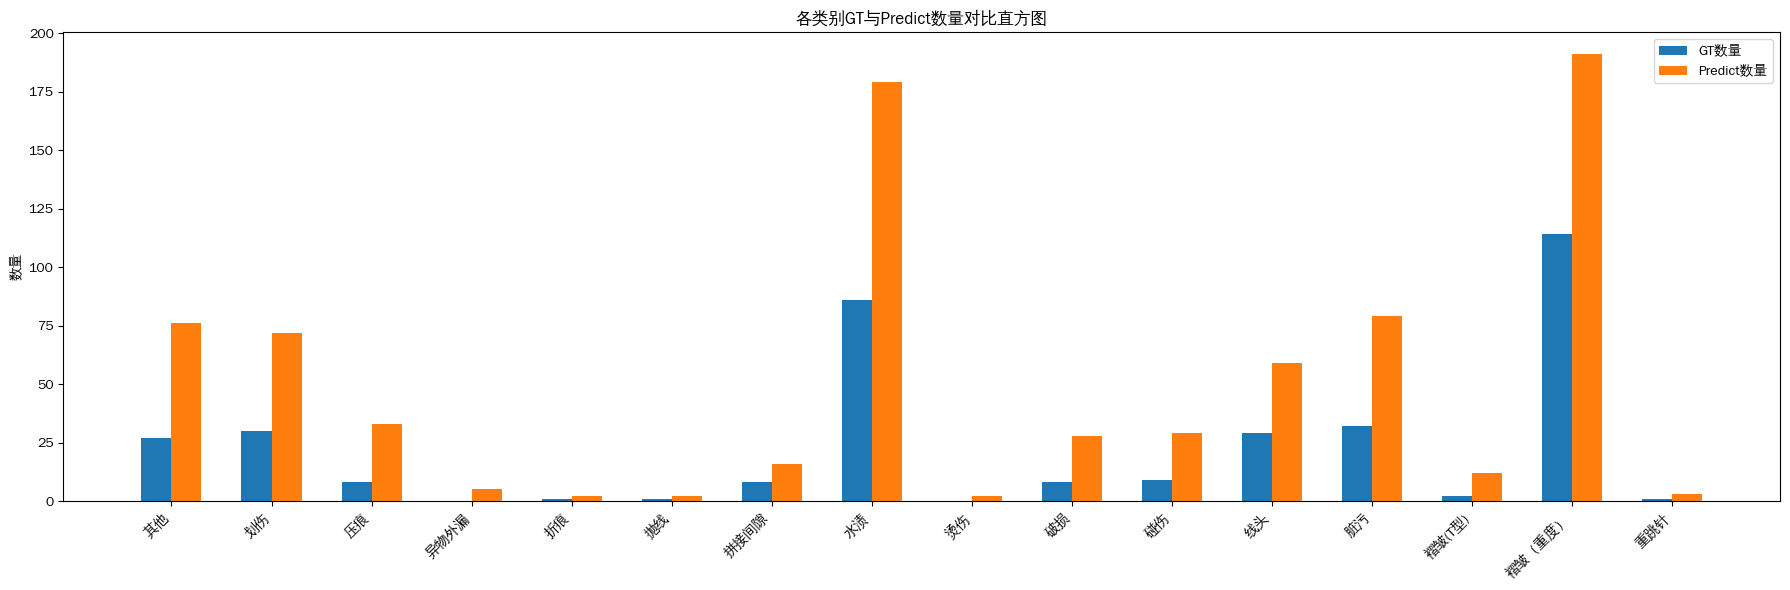

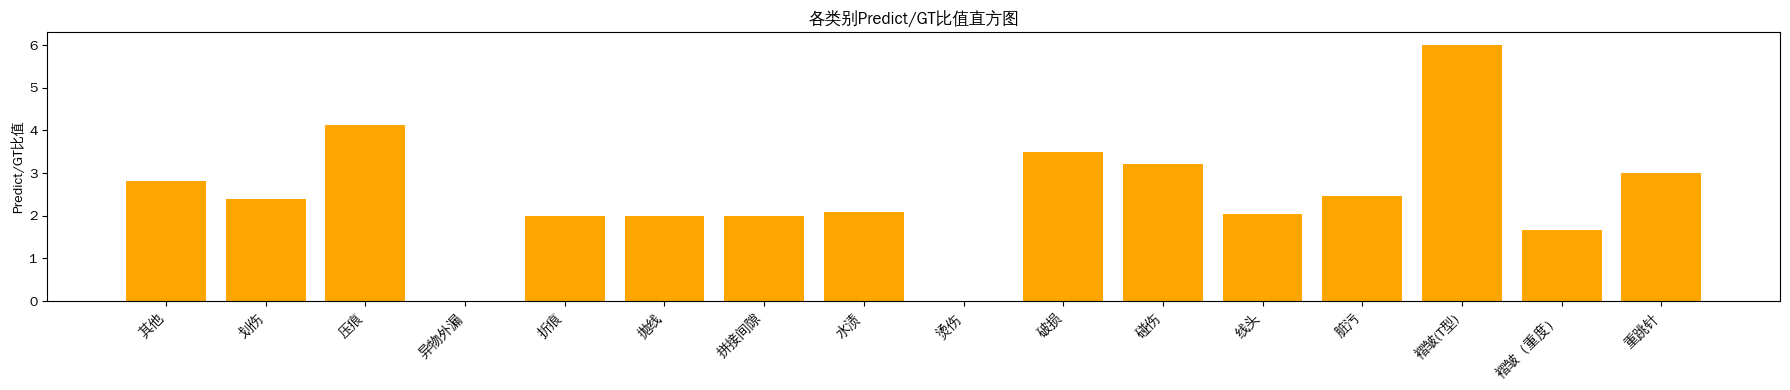

In [8]:
def get_gt_pred_ratio_df(gt_annos, pred_annos, name='类别'):
    """
    根据'name'列统计各类别数量，并返回GT和Predict的数量及比值的DataFrame，并绘制直方图
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    # 如果传入的是字典（如COCO格式），则取出'annotations'字段
    if isinstance(gt_annos, dict) and 'annotations' in gt_annos:
        gt_annos = gt_annos['annotations']
    if isinstance(pred_annos, dict) and 'annotations' in pred_annos:
        pred_annos = pred_annos['annotations']

    # 转为DataFrame
    gt_df = pd.DataFrame(gt_annos)
    pred_df = pd.DataFrame(pred_annos)

    # 只保留有'name'列的行
    gt_df = gt_df[gt_df['name'].notnull()]
    pred_df = pred_df[pred_df['name'].notnull()]

    # 统计各类别数量
    gt_counts = gt_df['name'].value_counts().sort_index()
    pred_counts = pred_df['name'].value_counts().sort_index()

    # 所有类别
    all_names = sorted(set(gt_counts.index).union(set(pred_counts.index)))
    gt_vals = [gt_counts.get(n, 0) for n in all_names]
    pred_vals = [pred_counts.get(n, 0) for n in all_names]

    # 计算比值（Predict/GT），GT为0时比值为np.nan
    ratio = [pred / gt if gt != 0 else np.nan for gt, pred in zip(gt_vals, pred_vals)]

    # 构建DataFrame
    df = pd.DataFrame({
        name: all_names,
        'GT数量': gt_vals,
        'Predict数量': pred_vals,
        'Predict/GT比值': ratio
    })

    # 绘制直方图
    x = np.arange(len(all_names))
    width = 0.3

    plt.figure(figsize=(18, 6))
    plt.bar(x - width/2, gt_vals, width, label='GT数量')
    plt.bar(x + width/2, pred_vals, width, label='Predict数量')
    plt.xticks(x, all_names, rotation=45, ha='right')
    plt.ylabel('数量')
    plt.title('各类别GT与Predict数量对比直方图')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 绘制比值直方图
    plt.figure(figsize=(18, 4))
    plt.bar(all_names, ratio, color='orange')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Predict/GT比值')
    plt.title('各类别Predict/GT比值直方图')
    plt.tight_layout()
    plt.show()

    return df

gt_pred_ratio_df = get_gt_pred_ratio_df(
    get_gt_annotations(cls_train_coco),
    get_predict_annotations(cls_train_coco),
    name='类别'
)


In [9]:
def add_iou_to_predictions(coco_data):
    """
    计算每个预测框与其对应的最大IOU，并将IOU作为新的一列加入预测框annotation中；
    同时，对于每个真实框，标记和它匹配度最高的iou值，作为新的一列加入真实框annotation中。
    并且，对于每个gt框，记录与其最大IOU的predict框的score（若无匹配则为np.nan）。
    不做任何过滤和类别修正。

    Args:
        coco_data: COCO格式数据，包含images, annotations(DataFrame), categories
    Returns:
        增加iou和max_score字段后的coco_data
    """
    import numpy as np

    def compute_iou(box1, box2):
        # box: [x, y, w, h]
        x1, y1, w1, h1 = box1
        x2, y2, w2, h2 = box2
        xa = max(x1, x2)
        ya = max(y1, y2)
        xb = min(x1 + w1, x2 + w2)
        yb = min(y1 + h1, y2 + h2)
        inter_w = max(0, xb - xa)
        inter_h = max(0, yb - ya)
        inter_area = inter_w * inter_h
        area1 = w1 * h1
        area2 = w2 * h2
        union_area = area1 + area2 - inter_area
        if union_area == 0:
            return 0.0
        return inter_area / union_area

    anns_df = coco_data["annotations"]
    # 只保留gt和predict的索引
    pred_mask = anns_df["source"] == "predict"
    gt_mask = anns_df["source"] != "predict"

    # 按image_id分组
    pred_group = anns_df[pred_mask].groupby("image_id")
    gt_group = anns_df[gt_mask].groupby("image_id")

    # 新增iou列，默认0
    anns_df["iou"] = 0.0

    # 先计算每个预测框的最大IOU
    for image_id, preds in pred_group:
        if image_id in gt_group.groups:
            gts = anns_df.loc[gt_group.groups[image_id]]
        else:
            gts = None
        for idx in preds.index:
            pred_bbox = anns_df.at[idx, "bbox"]
            max_iou = 0.0
            if gts is not None and len(gts) > 0:
                for gt_bbox in gts["bbox"]:
                    iou = compute_iou(pred_bbox, gt_bbox)
                    if iou > max_iou:
                        max_iou = iou
            anns_df.at[idx, "iou"] = max_iou

    # 再计算每个gt框被所有predict框匹配到的最大IOU，并记录最大IOU对应的score
    for image_id, gts in gt_group:
        if image_id in pred_group.groups:
            preds = anns_df.loc[pred_group.groups[image_id]]
        else:
            preds = None
        for idx in gts.index:
            gt_bbox = anns_df.at[idx, "bbox"]
            max_iou = 0.0
            max_score = np.nan
            if preds is not None and len(preds) > 0:
                for pred_idx, pred_row in preds.iterrows():
                    pred_bbox = pred_row["bbox"]
                    iou = compute_iou(gt_bbox, pred_bbox)
                    if iou > max_iou:
                        max_iou = iou
                        # 预测框的score字段
                        max_score = pred_row.get("score", np.nan)
            anns_df.at[idx, "iou"] = max_iou
            anns_df.at[idx, "score"] = max_score

    coco_data["annotations"] = anns_df
    return coco_data

In [10]:
cls_train_coco = add_iou_to_predictions(cls_train_coco)
cls_valid_coco = add_iou_to_predictions(cls_valid_coco)
cls_train_coco['annotations']

,id_x,image_id,category_id,bbox,area,segmentation,transcription,iscrowd,source,score,...,id,license,file_name,height,width,date_captured,mask_null,interested_area,not_interested_area,iou
0,0,0,8,"[567.4458536585366, 1574.4624390243903, 49.451...",2297.260971,[[]],NaN,0,gt,0.578582,...,0,1,1756717183496__p_0002_f9f1d25c48db4b5086d68fa9...,2048.0,2046.0,n/a,False,[],[],0.821107
1,1,5,16,"[321.23926305138747, 971.2612906427289, 530.11...",164970.580057,[[]],NaN,0,gt,0.608206,...,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[],0.876555
2,2,5,16,"[1047.7115977073206, 796.7067049410758, 161.04...",37464.305244,[[]],NaN,0,gt,0.528962,...,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[],0.576731
3,3,7,8,"[1324.499797198969, 1664.161499040115, 6.56030...",65.058604,[[]],NaN,0,gt,0.335175,...,7,1,1756717181783__p_0031_4e002985ef7c4913a4524f7f...,2048.0,2046.0,n/a,False,[],[],0.691172
4,4,13,8,"[2994.802079555072, 1472.5003022609117, 579.97...",465749.661659,[[]],NaN,0,gt,0.608373,...,13,1,1756717174529__p_0018_4ee0e4f8ef5444b599c374ec...,4100.0,4096.0,n/a,False,[],[],0.899727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,784,510,2,"[1095.830078125, 1785.29736328125, 1302.235839...",791204.937500,NaN,NaN,0,predict,0.269988,...,510,1,1756716879769_50cbd5ef-bc52-4406-9e4c-d76cb515...,4096.0,4096.0,n/a,False,[],[],0.000000
1140,785,511,8,"[2437.838134765625, 858.6640014648438, 79.3574...",15488.002930,NaN,NaN,0,predict,0.838007,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.688635
1141,786,511,16,"[2444.3544921875, 1338.9090576171875, 885.2868...",414046.687500,NaN,NaN,0,predict,0.582011,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.738059
1142,787,511,16,"[2575.78125, 1664.7435302734375, 289.809814453...",61726.093750,NaN,NaN,0,predict,0.414127,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.833976


### 2.2 各类别缺陷像素area、x、y、w、h分布

#### 箱线图

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_by_feature(df1, df2, feature, ylabel, title, name1='Train', name2='Valid'):
    """
    绘制指定特征的箱线图，支持自定义两个数据集的名称
    """
    df1 = df1[['name', feature]].copy()
    df1['dataset'] = name1
    df2 = df2[['name', feature]].copy()
    df2['dataset'] = name2
    df = pd.concat([df1, df2], ignore_index=True)
    if feature == 'area':
        df['sqrt_area'] = df['area'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)
        y = 'sqrt_area'
    elif feature == 'width':
        df['sqrt_width'] = df['width'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)
        y = 'sqrt_width'
    elif feature == 'height':
        df['sqrt_height'] = df['height'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)
        y = 'sqrt_height'
    elif feature == 'wh_ratio':
        df['wh_ratio'] = df.apply(lambda row: row['width'] / row['height'] if pd.notnull(row['width']) and pd.notnull(row['height']) and row['height'] > 0 else np.nan, axis=1)
        y = 'wh_ratio'
    elif feature == 'max_side':
        df['max_side'] = df.apply(lambda row: max(row['width'], row['height']) if pd.notnull(row['width']) and pd.notnull(row['height']) else np.nan, axis=1)
        y = 'max_side'
    else:
        y = feature
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x='name', y=y, hue='dataset', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('类别')
    plt.ylabel(ylabel)
    # 在箱线图上显示均值数值
    group_means = df.groupby(['name', 'dataset'])[y].mean().reset_index()
    for i, name in enumerate(df['name'].unique()):
        for j, dataset in enumerate([name1, name2]):
            mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)][y]
            if not mean_val.empty:
                n_datasets = 2
                offset = (j - 0.5) * 0.2
                ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}',
                        ha='center', va='bottom', fontsize=9, color='black')
    plt.tight_layout()
    plt.show()

def get_center(bbox):
    if isinstance(bbox, (list, tuple)) and len(bbox) == 4:
        x, y, w, h = bbox
        return x + w / 2, y + h / 2
    else:
        return np.nan, np.nan

def extract_bbox_features(df):
    """
    提取bbox的x, y, w, h, wh_ratio, max_side特征
    """
    df = df.copy()
    df[['x', 'y', 'w', 'h']] = df['bbox'].apply(lambda b: pd.Series(b) if isinstance(b, (list, tuple)) and len(b) == 4 else pd.Series([np.nan, np.nan, np.nan, np.nan]))
    df['wh_ratio'] = df.apply(lambda row: row['w'] / row['h'] if pd.notnull(row['w']) and pd.notnull(row['h']) and row['h'] > 0 else np.nan, axis=1)
    df['max_side'] = df.apply(lambda row: max(row['w'], row['h']) if pd.notnull(row['w']) and pd.notnull(row['h']) else np.nan, axis=1)
    return df

def plot_bbox_feature_boxplots(df1, df2, name1='Train', name2='Valid'):
    """
    绘制x, y, w, h, wh_ratio, max_side的箱线图
    """
    bbox_df1 = extract_bbox_features(df1)
    bbox_df1['dataset'] = name1
    bbox_df2 = extract_bbox_features(df2)
    bbox_df2['dataset'] = name2
    bbox_df = pd.concat([bbox_df1, bbox_df2], ignore_index=True)
    features = ['x', 'y', 'w', 'h', 'wh_ratio', 'max_side']
    feature_names = {'x': '中心点x', 'y': '中心点y', 'w': '宽度', 'h': '高度', 'wh_ratio': '宽高比', 'max_side': '最长边'}
    for feat in features:
        plt.figure(figsize=(18, 6))
        ax = sns.boxplot(x='name', y=feat, hue='dataset', data=bbox_df)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'{feature_names[feat]} 箱线图')
        plt.xlabel('类别')
        plt.ylabel(feature_names[feat])
        group_means = bbox_df.groupby(['name', 'dataset'])[feat].mean().reset_index()
        for i, name in enumerate(bbox_df['name'].unique()):
            for j, dataset in enumerate([name1, name2]):
                mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)][feat]
                if not mean_val.empty:
                    n_datasets = 2
                    offset = (j - 0.5) * 0.2
                    ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}',
                            ha='center', va='bottom', fontsize=9, color='black')
        plt.tight_layout()
        plt.show()

def plot_area_boxplot(df1, df2, name1='Train', name2='Valid'):
    """
    绘制面积（sqrt(area)）的箱线图
    """
    area_df1 = df1[['name', 'area']].copy()
    area_df1['dataset'] = name1
    area_df2 = df2[['name', 'area']].copy()
    area_df2['dataset'] = name2
    area_df = pd.concat([area_df1, area_df2], ignore_index=True)
    area_df['sqrt_area'] = area_df['area'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x='name', y='sqrt_area', hue='dataset', data=area_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('sqrt(area) 箱线图')
    plt.xlabel('类别')
    plt.ylabel('sqrt(area)')
    group_means = area_df.groupby(['name', 'dataset'])['sqrt_area'].mean().reset_index()
    for i, name in enumerate(area_df['name'].unique()):
        for j, dataset in enumerate([name1, name2]):
            mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)]['sqrt_area']
            if not mean_val.empty:
                n_datasets = 2
                offset = (j - 0.5) * 0.2
                ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}',
                        ha='center', va='bottom', fontsize=9, color='black')
    plt.tight_layout()
    plt.show()

def plot_max_side_boxplot(df1, df2, name1='Train', name2='Valid'):
    """
    绘制最长边的箱线图
    """
    bbox_df1 = extract_bbox_features(df1)
    bbox_df1['dataset'] = name1
    bbox_df2 = extract_bbox_features(df2)
    bbox_df2['dataset'] = name2
    max_side_df = pd.concat([bbox_df1[['name', 'max_side', 'dataset']], bbox_df2[['name', 'max_side', 'dataset']]], ignore_index=True)
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x='name', y='max_side', hue='dataset', data=max_side_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('长边 箱线图')
    plt.xlabel('类别')
    plt.ylabel('长边')
    group_means = max_side_df.groupby(['name', 'dataset'])['max_side'].mean().reset_index()
    for i, name in enumerate(max_side_df['name'].unique()):
        for j, dataset in enumerate([name1, name2]):
            mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)]['max_side']
            if not mean_val.empty:
                n_datasets = 2
                offset = (j - 0.5) * 0.2
                ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}',
                        ha='center', va='bottom', fontsize=9, color='black')
    plt.tight_layout()
    plt.show()


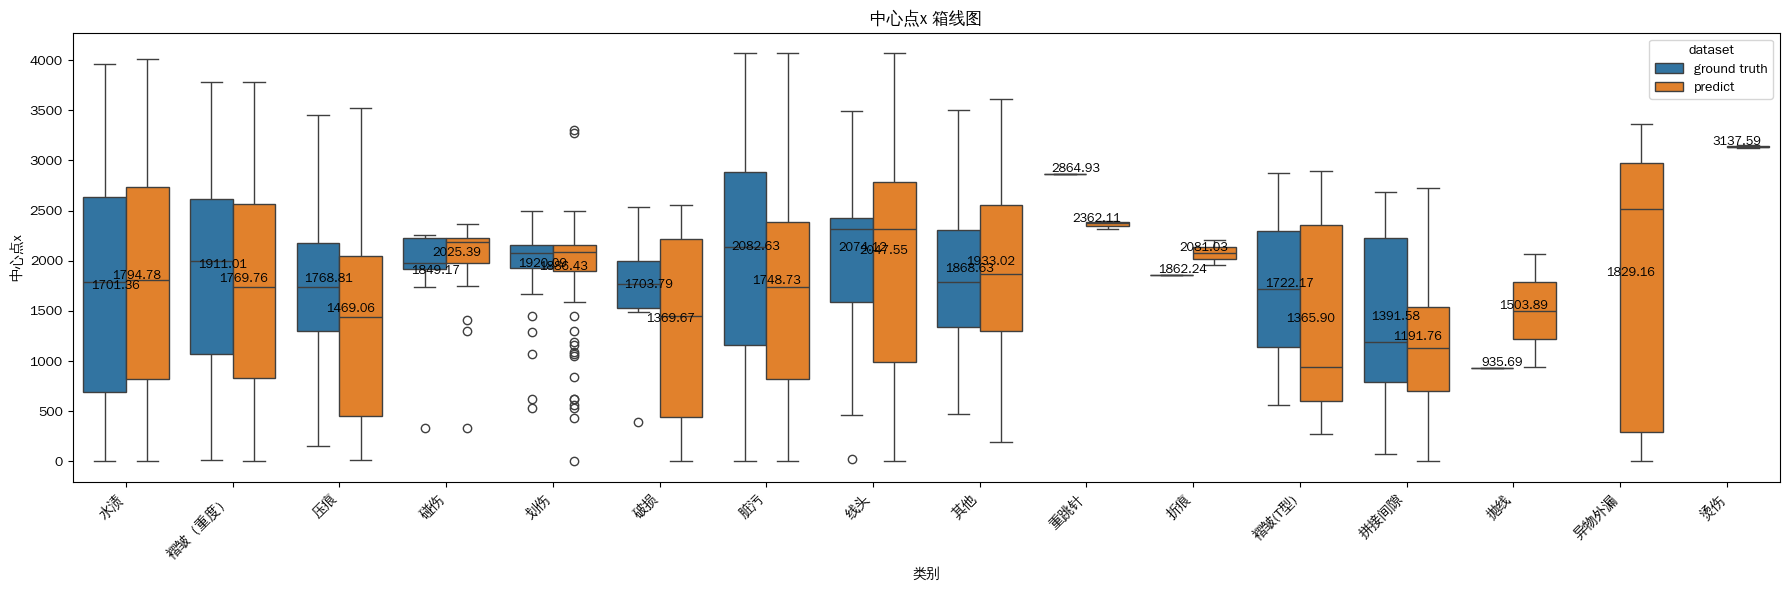

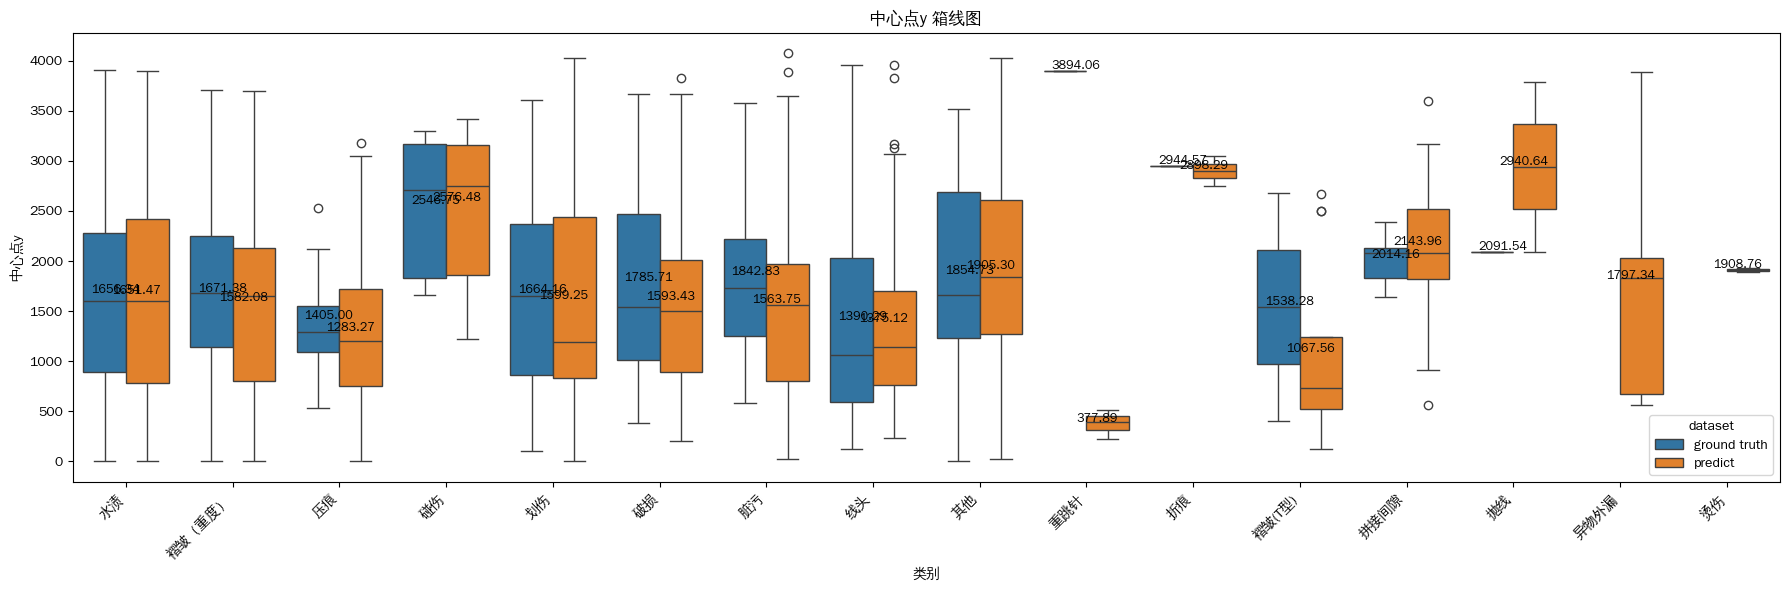

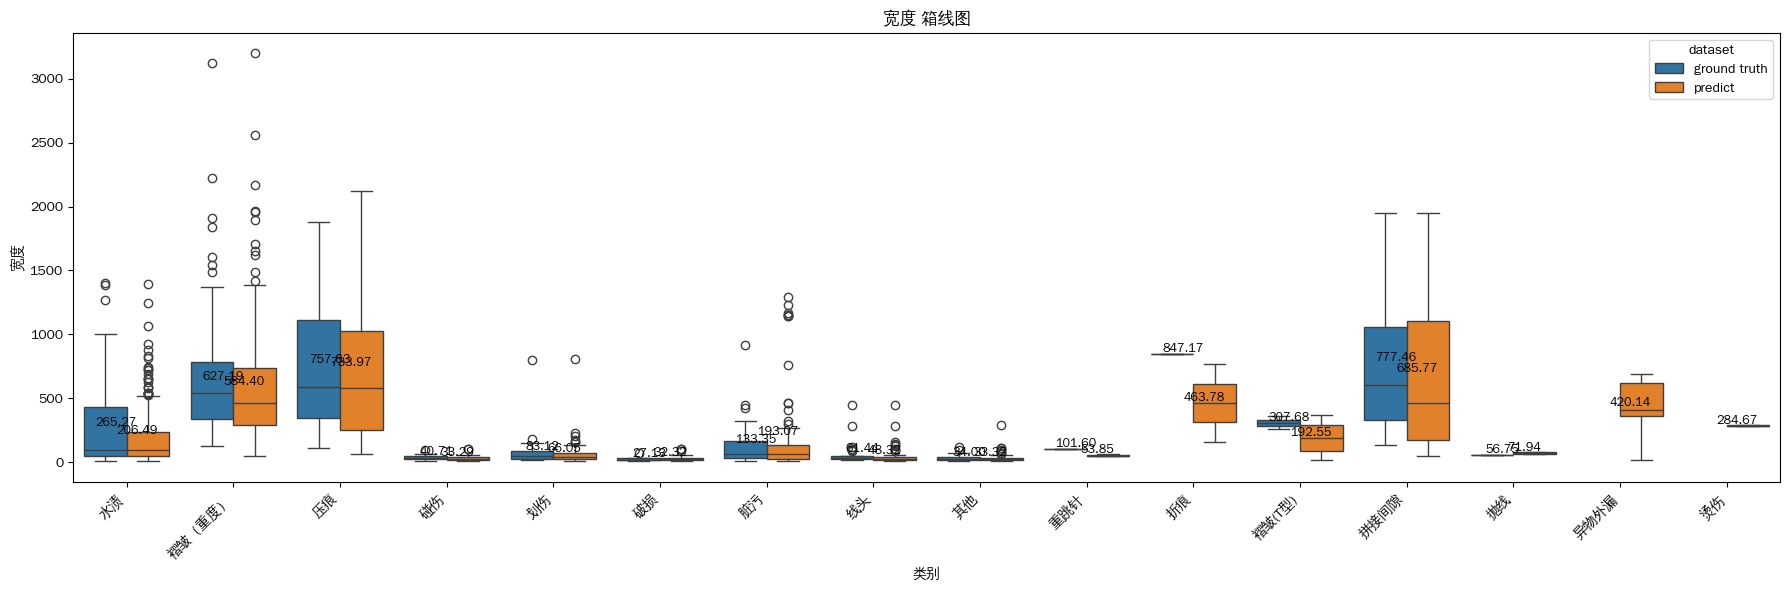

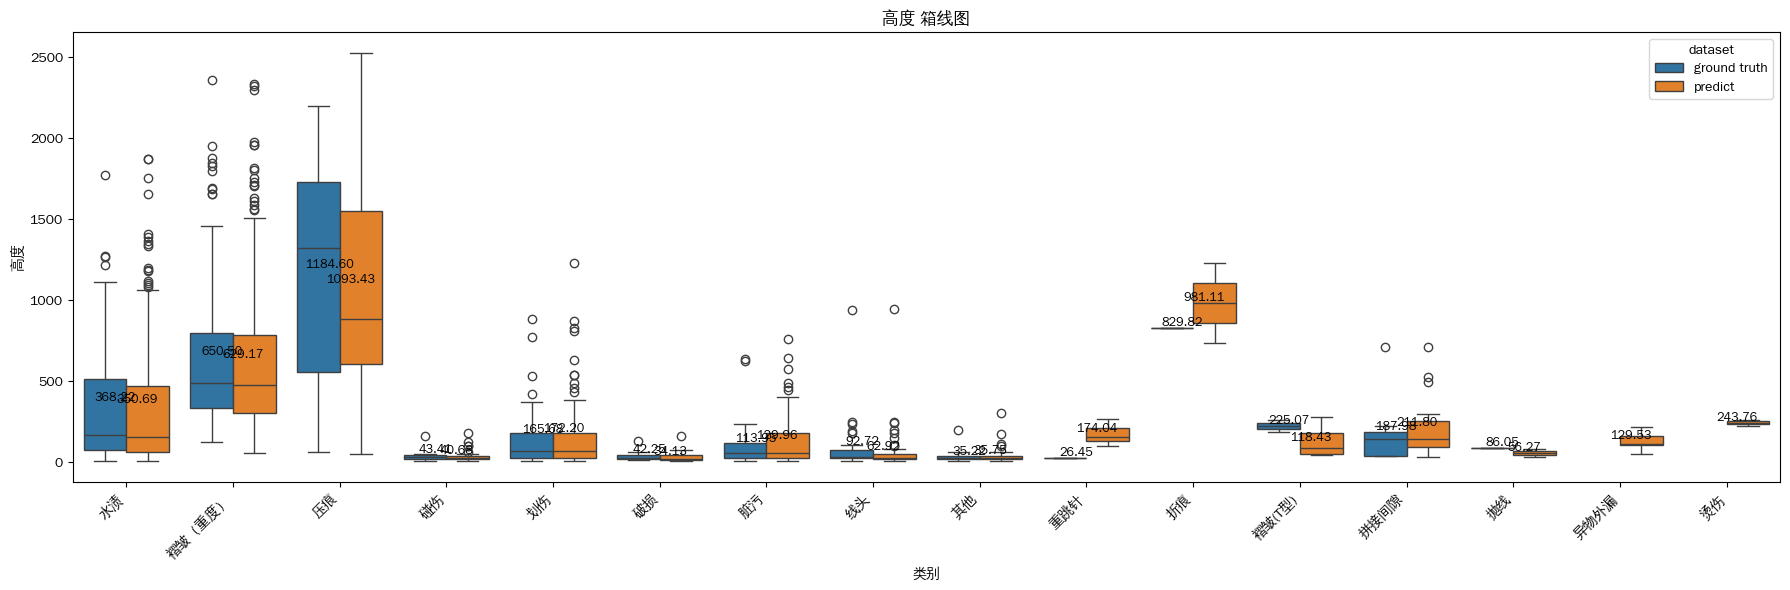

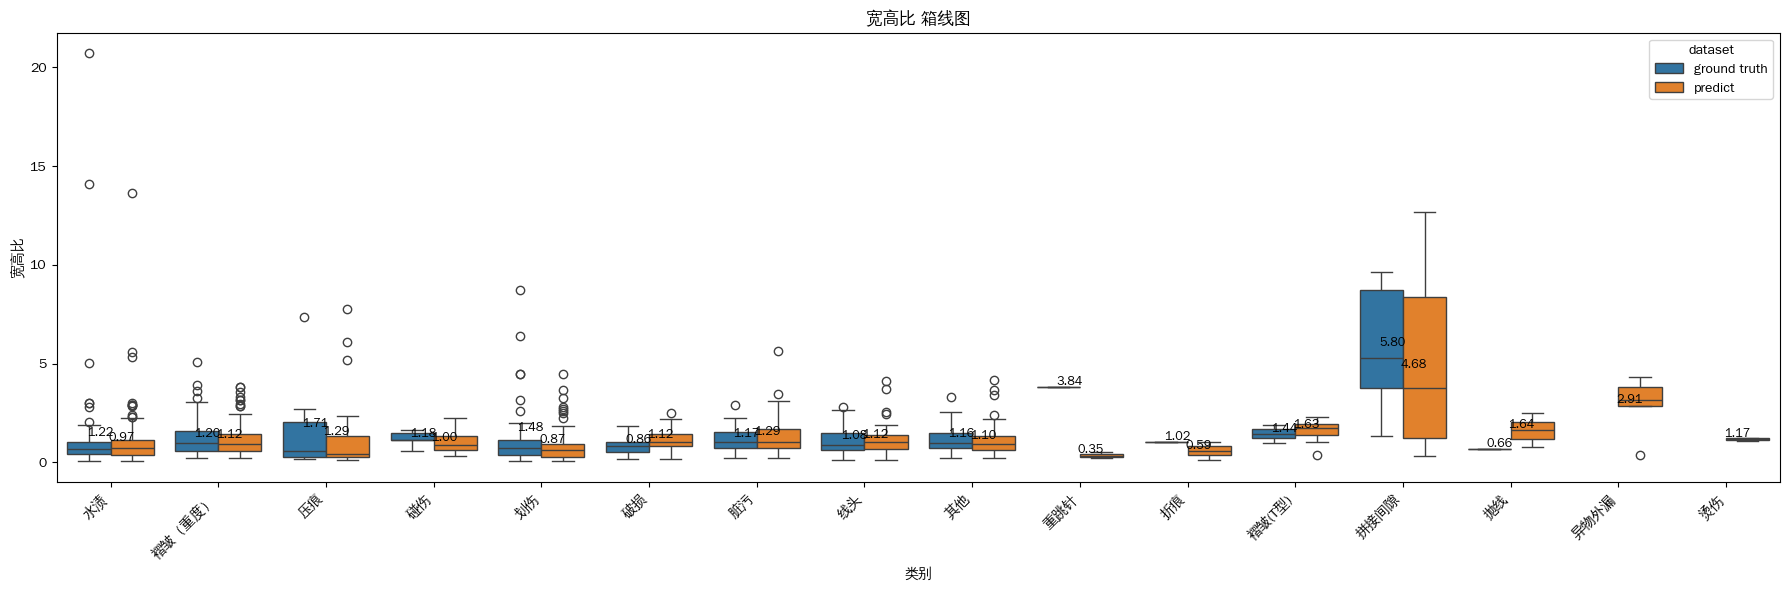

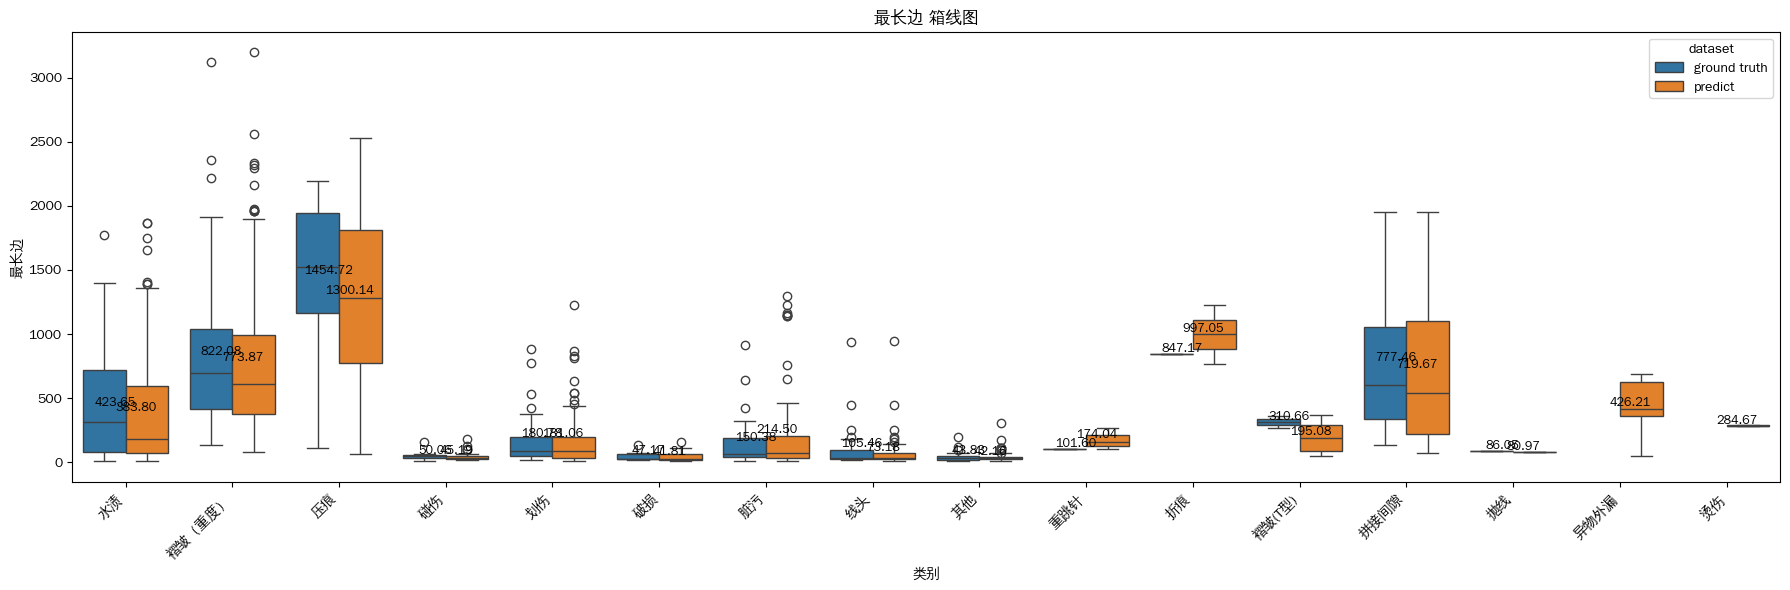

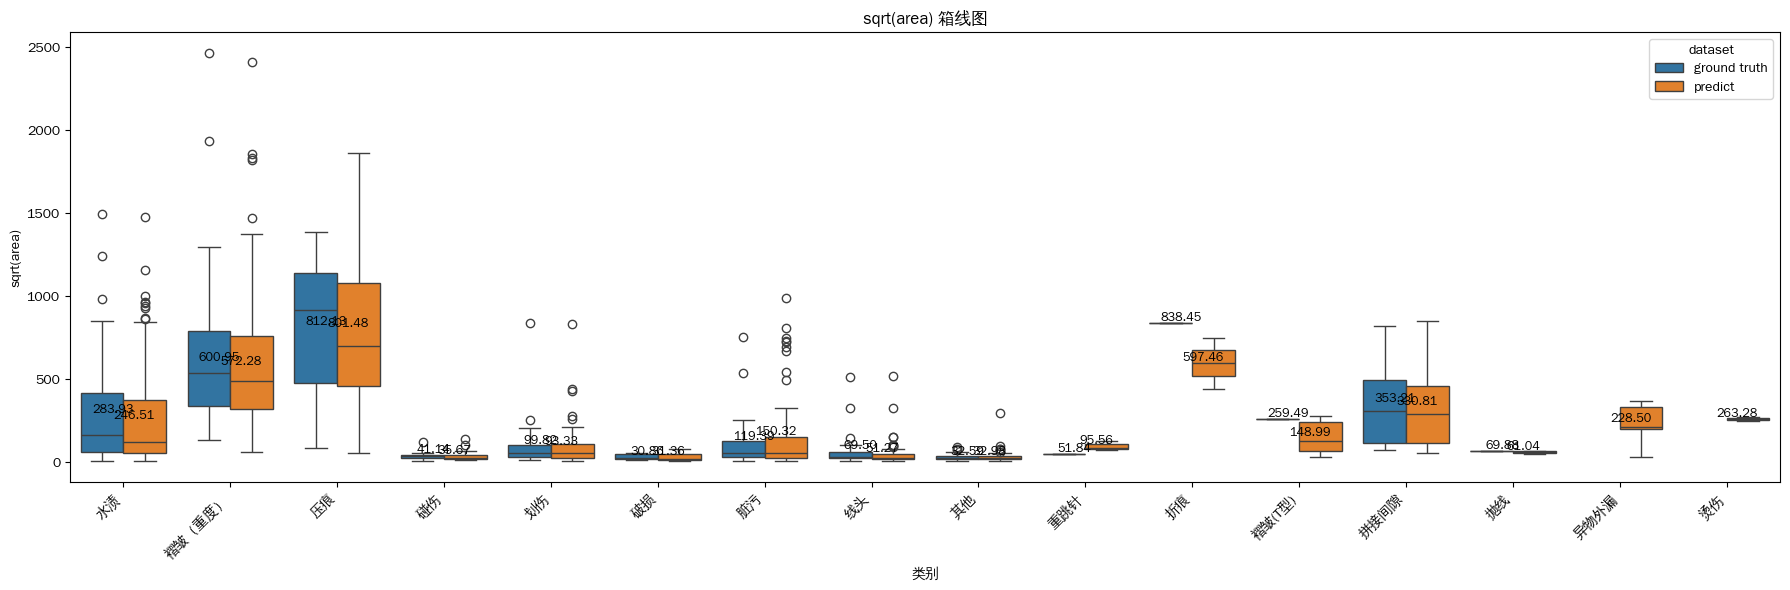

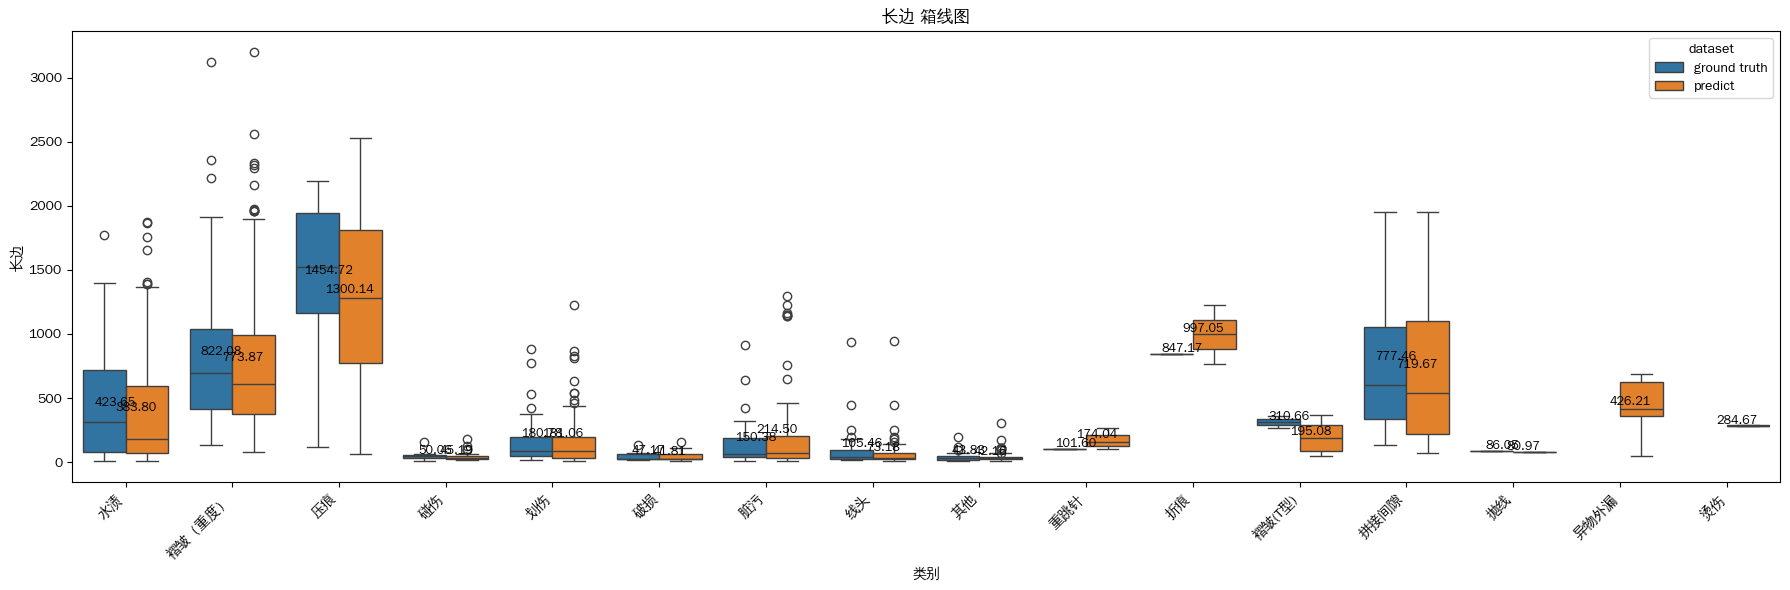

In [12]:
for fun in (plot_bbox_feature_boxplots, plot_area_boxplot, plot_max_side_boxplot):
    fun(get_gt_annotations(cls_train_coco)['annotations'], get_predict_annotations(cls_train_coco)['annotations'] , name1='ground truth', name2='predict')

#### 中心点坐标、宽高 分布散点图

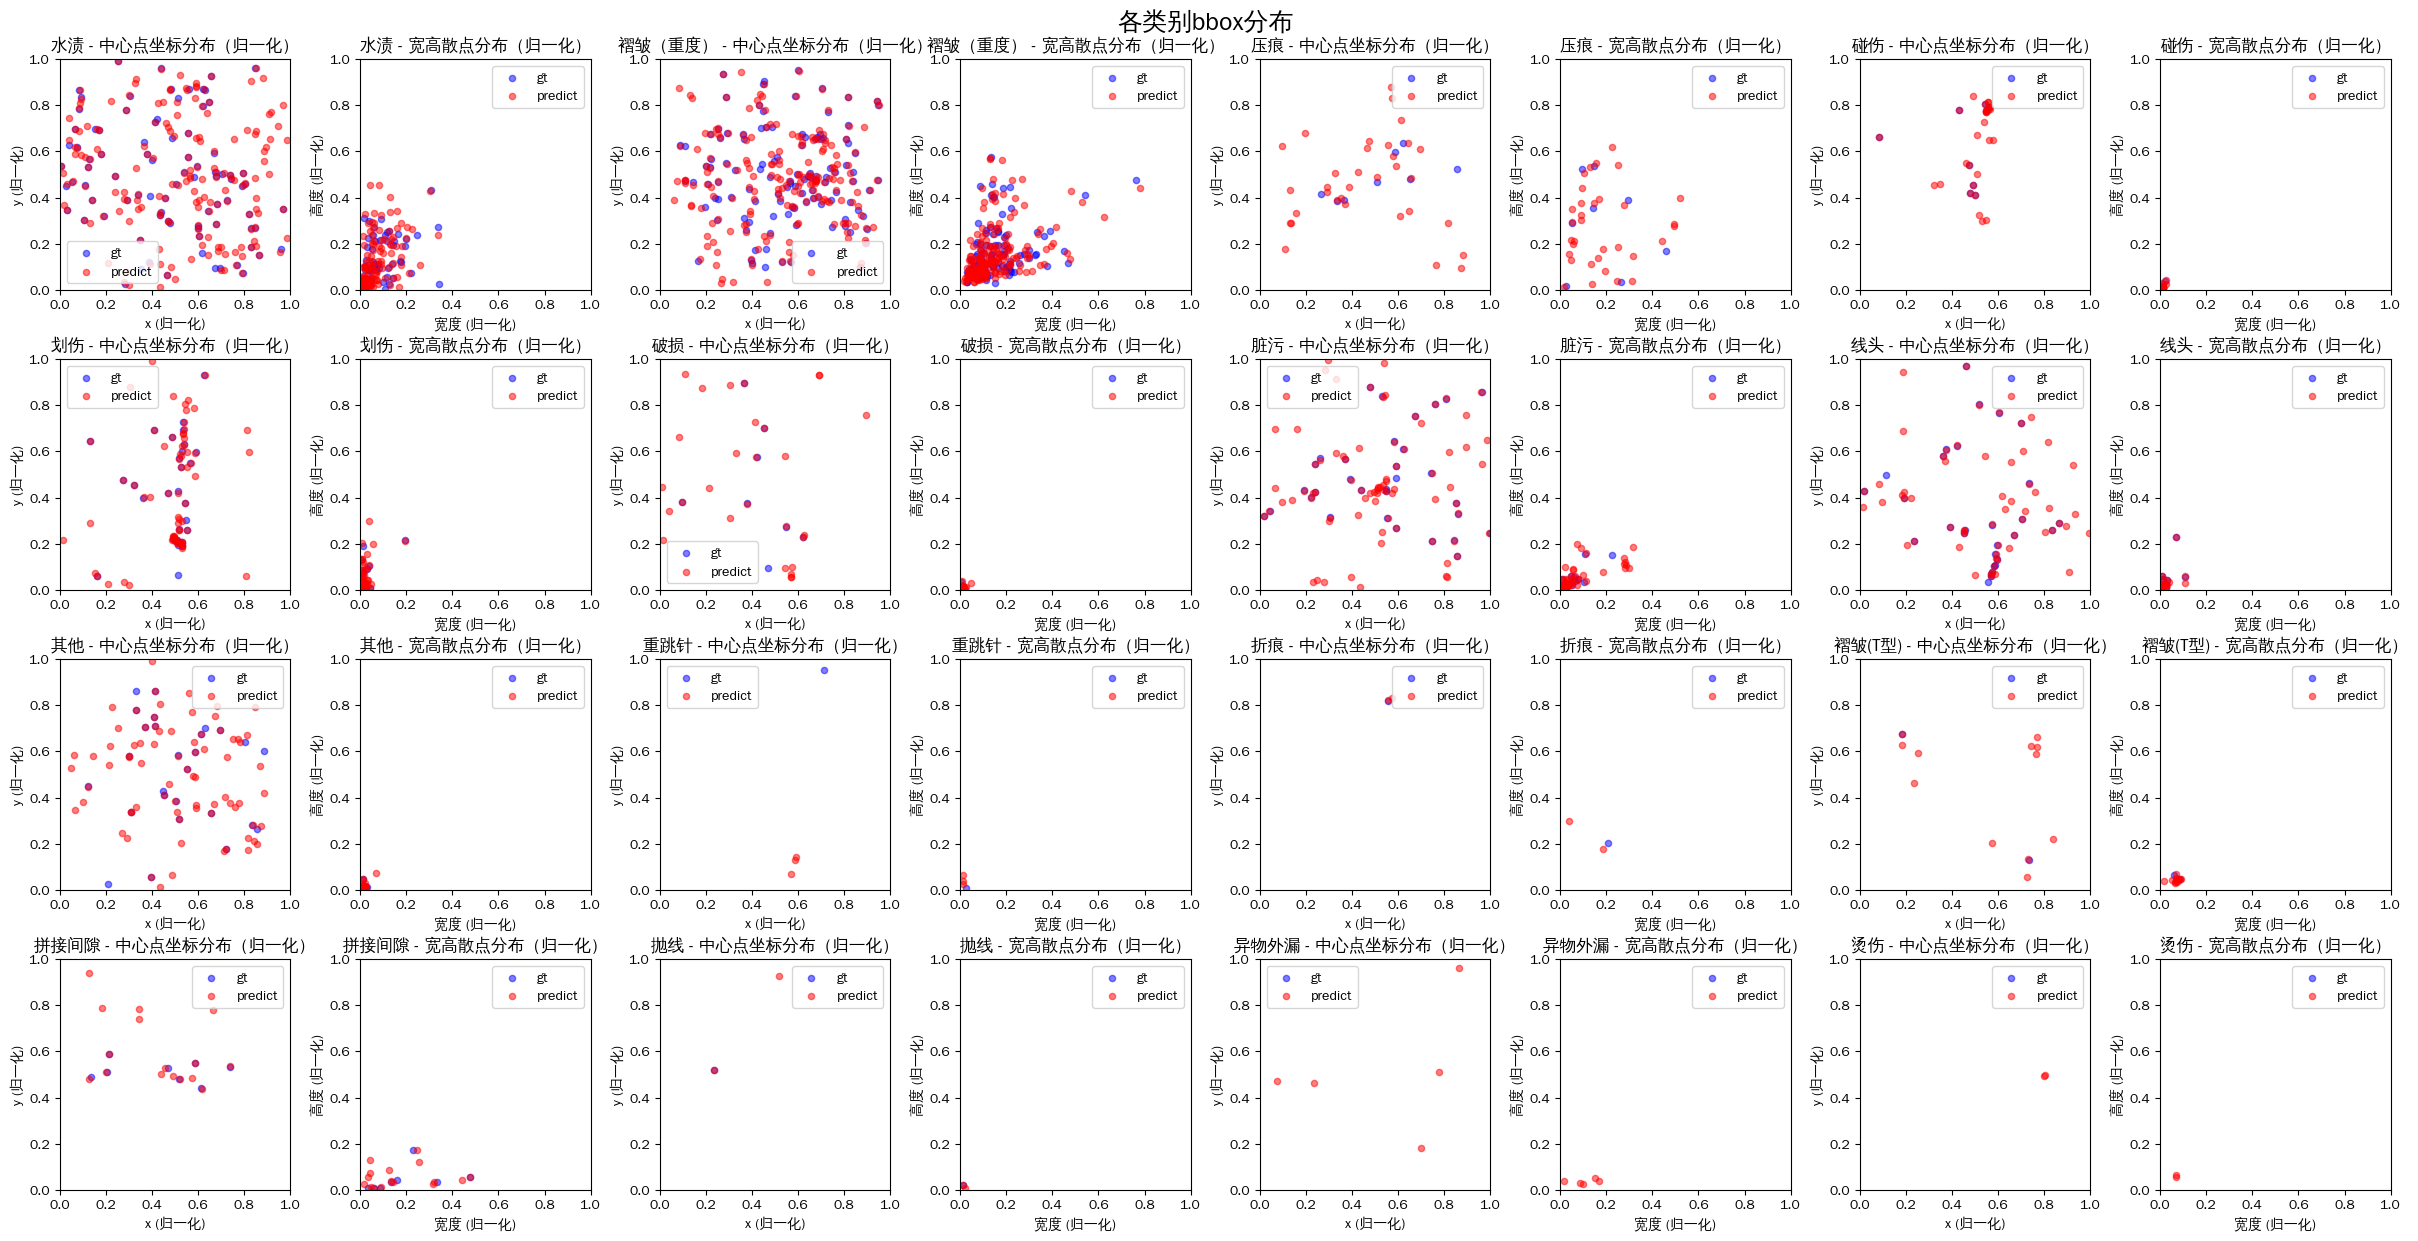

In [13]:
def plot_bbox_distributions(bbox_df):
    """
    每行并列4个类别，一共8张图（4个类别*2列），
    每个类别两列（中心点、宽高），坐标轴固定为0到1
    """
    norm_bbox_df = bbox_df.copy()
    norm_bbox_df['c_x_norm'] = norm_bbox_df['c_x'] / norm_bbox_df['width']
    norm_bbox_df['c_y_norm'] = norm_bbox_df['c_y'] / norm_bbox_df['height']
    norm_bbox_df['w_norm'] = norm_bbox_df['w'] / norm_bbox_df['width']
    norm_bbox_df['h_norm'] = norm_bbox_df['h'] / norm_bbox_df['height']
    categories = norm_bbox_df['name'].unique()
    n_cat = len(categories)
    n_cat_per_row = 4
    n_rows = (n_cat + n_cat_per_row - 1) // n_cat_per_row
    n_cols = n_cat_per_row * 2  # 每个类别两列

    fig_height = 3 * n_rows  
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cat_per_row, fig_height), constrained_layout=True)

    if n_rows == 1:
        axes = axes.reshape(1, n_cols)
    elif n_cols == 1:
        axes = axes.reshape(n_rows, 1)

    for idx, cat in enumerate(categories):
        row = idx // n_cat_per_row
        col_base = (idx % n_cat_per_row) * 2

        ax1 = axes[row, col_base]
        for ds, color in zip(['gt', 'predict'], ['b', 'r']):
            data = norm_bbox_df[(norm_bbox_df['name'] == cat) & (norm_bbox_df['source'] == ds)]
            ax1.scatter(data['c_x_norm'], data['c_y_norm'], alpha=0.5, s=20, label=ds, color=color)
        ax1.set_title(f'{cat} - 中心点坐标分布（归一化）')
        ax1.set_xlabel('x (归一化)')
        ax1.set_ylabel('y (归一化)')
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.set_aspect('equal')
        ax1.legend()

        ax2 = axes[row, col_base + 1]
        for ds, color in zip(['gt', 'predict'], ['b', 'r']):
            data = norm_bbox_df[(norm_bbox_df['name'] == cat) & (norm_bbox_df['source'] == ds)]
            ax2.scatter(data['w_norm'], data['h_norm'], alpha=0.5, s=20, label=ds, color=color)
        ax2.set_title(f'{cat} - 宽高散点分布（归一化）')
        ax2.set_xlabel('宽度 (归一化)')
        ax2.set_ylabel('高度 (归一化)')
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.set_aspect('equal')
        ax2.legend()

    total_axes = n_rows * n_cols
    for i in range(n_cat * 2, total_axes):
        row = i // n_cols
        col = i % n_cols
        axes[row, col].axis('off')

    plt.suptitle('各类别bbox分布', y=1.02, fontsize=18)
    # 使用constrained_layout后不需要再用tight_layout
    plt.show()

plot_bbox_distributions(cls_train_coco['annotations'])


## 3. Analysis of Prediction Results(预测结果分析)

In [14]:
get_gt_annotations(cls_train_coco)['annotations']

,id_x,image_id,category_id,bbox,area,segmentation,transcription,iscrowd,source,score,...,id,license,file_name,height,width,date_captured,mask_null,interested_area,not_interested_area,iou
0,0,0,8,"[567.4458536585366, 1574.4624390243903, 49.451...",2297.260971,[[]],NaN,0,gt,0.578582,...,0,1,1756717183496__p_0002_f9f1d25c48db4b5086d68fa9...,2048.0,2046.0,n/a,False,[],[],0.821107
1,1,5,16,"[321.23926305138747, 971.2612906427289, 530.11...",164970.580057,[[]],NaN,0,gt,0.608206,...,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[],0.876555
2,2,5,16,"[1047.7115977073206, 796.7067049410758, 161.04...",37464.305244,[[]],NaN,0,gt,0.528962,...,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[],0.576731
3,3,7,8,"[1324.499797198969, 1664.161499040115, 6.56030...",65.058604,[[]],NaN,0,gt,0.335175,...,7,1,1756717181783__p_0031_4e002985ef7c4913a4524f7f...,2048.0,2046.0,n/a,False,[],[],0.691172
4,4,13,8,"[2994.802079555072, 1472.5003022609117, 579.97...",465749.661659,[[]],NaN,0,gt,0.608373,...,13,1,1756717174529__p_0018_4ee0e4f8ef5444b599c374ec...,4100.0,4096.0,n/a,False,[],[],0.899727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,351,509,14,"[3379.7841603741726, 1272.8957806553851, 272.2...",44891.379387,[[]],NaN,0,gt,0.366688,...,509,1,1756716880482_cbe4c94d-d7d6-4a03-a8c1-29a7c67e...,4096.0,4096.0,n/a,False,[],[],0.771393
352,352,511,16,"[2562.3874560476957, 1678.7562314067754, 300.9...",56053.807791,[[]],NaN,0,gt,0.414127,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.833976
353,353,511,8,"[2428.743415097952, 872.3518713018866, 95.8850...",15044.614532,[[]],NaN,0,gt,0.838007,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.688635
354,354,511,16,"[2443.699501230856, 1321.6768693303484, 829.49...",330869.186578,[[]],NaN,0,gt,0.582011,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.738059


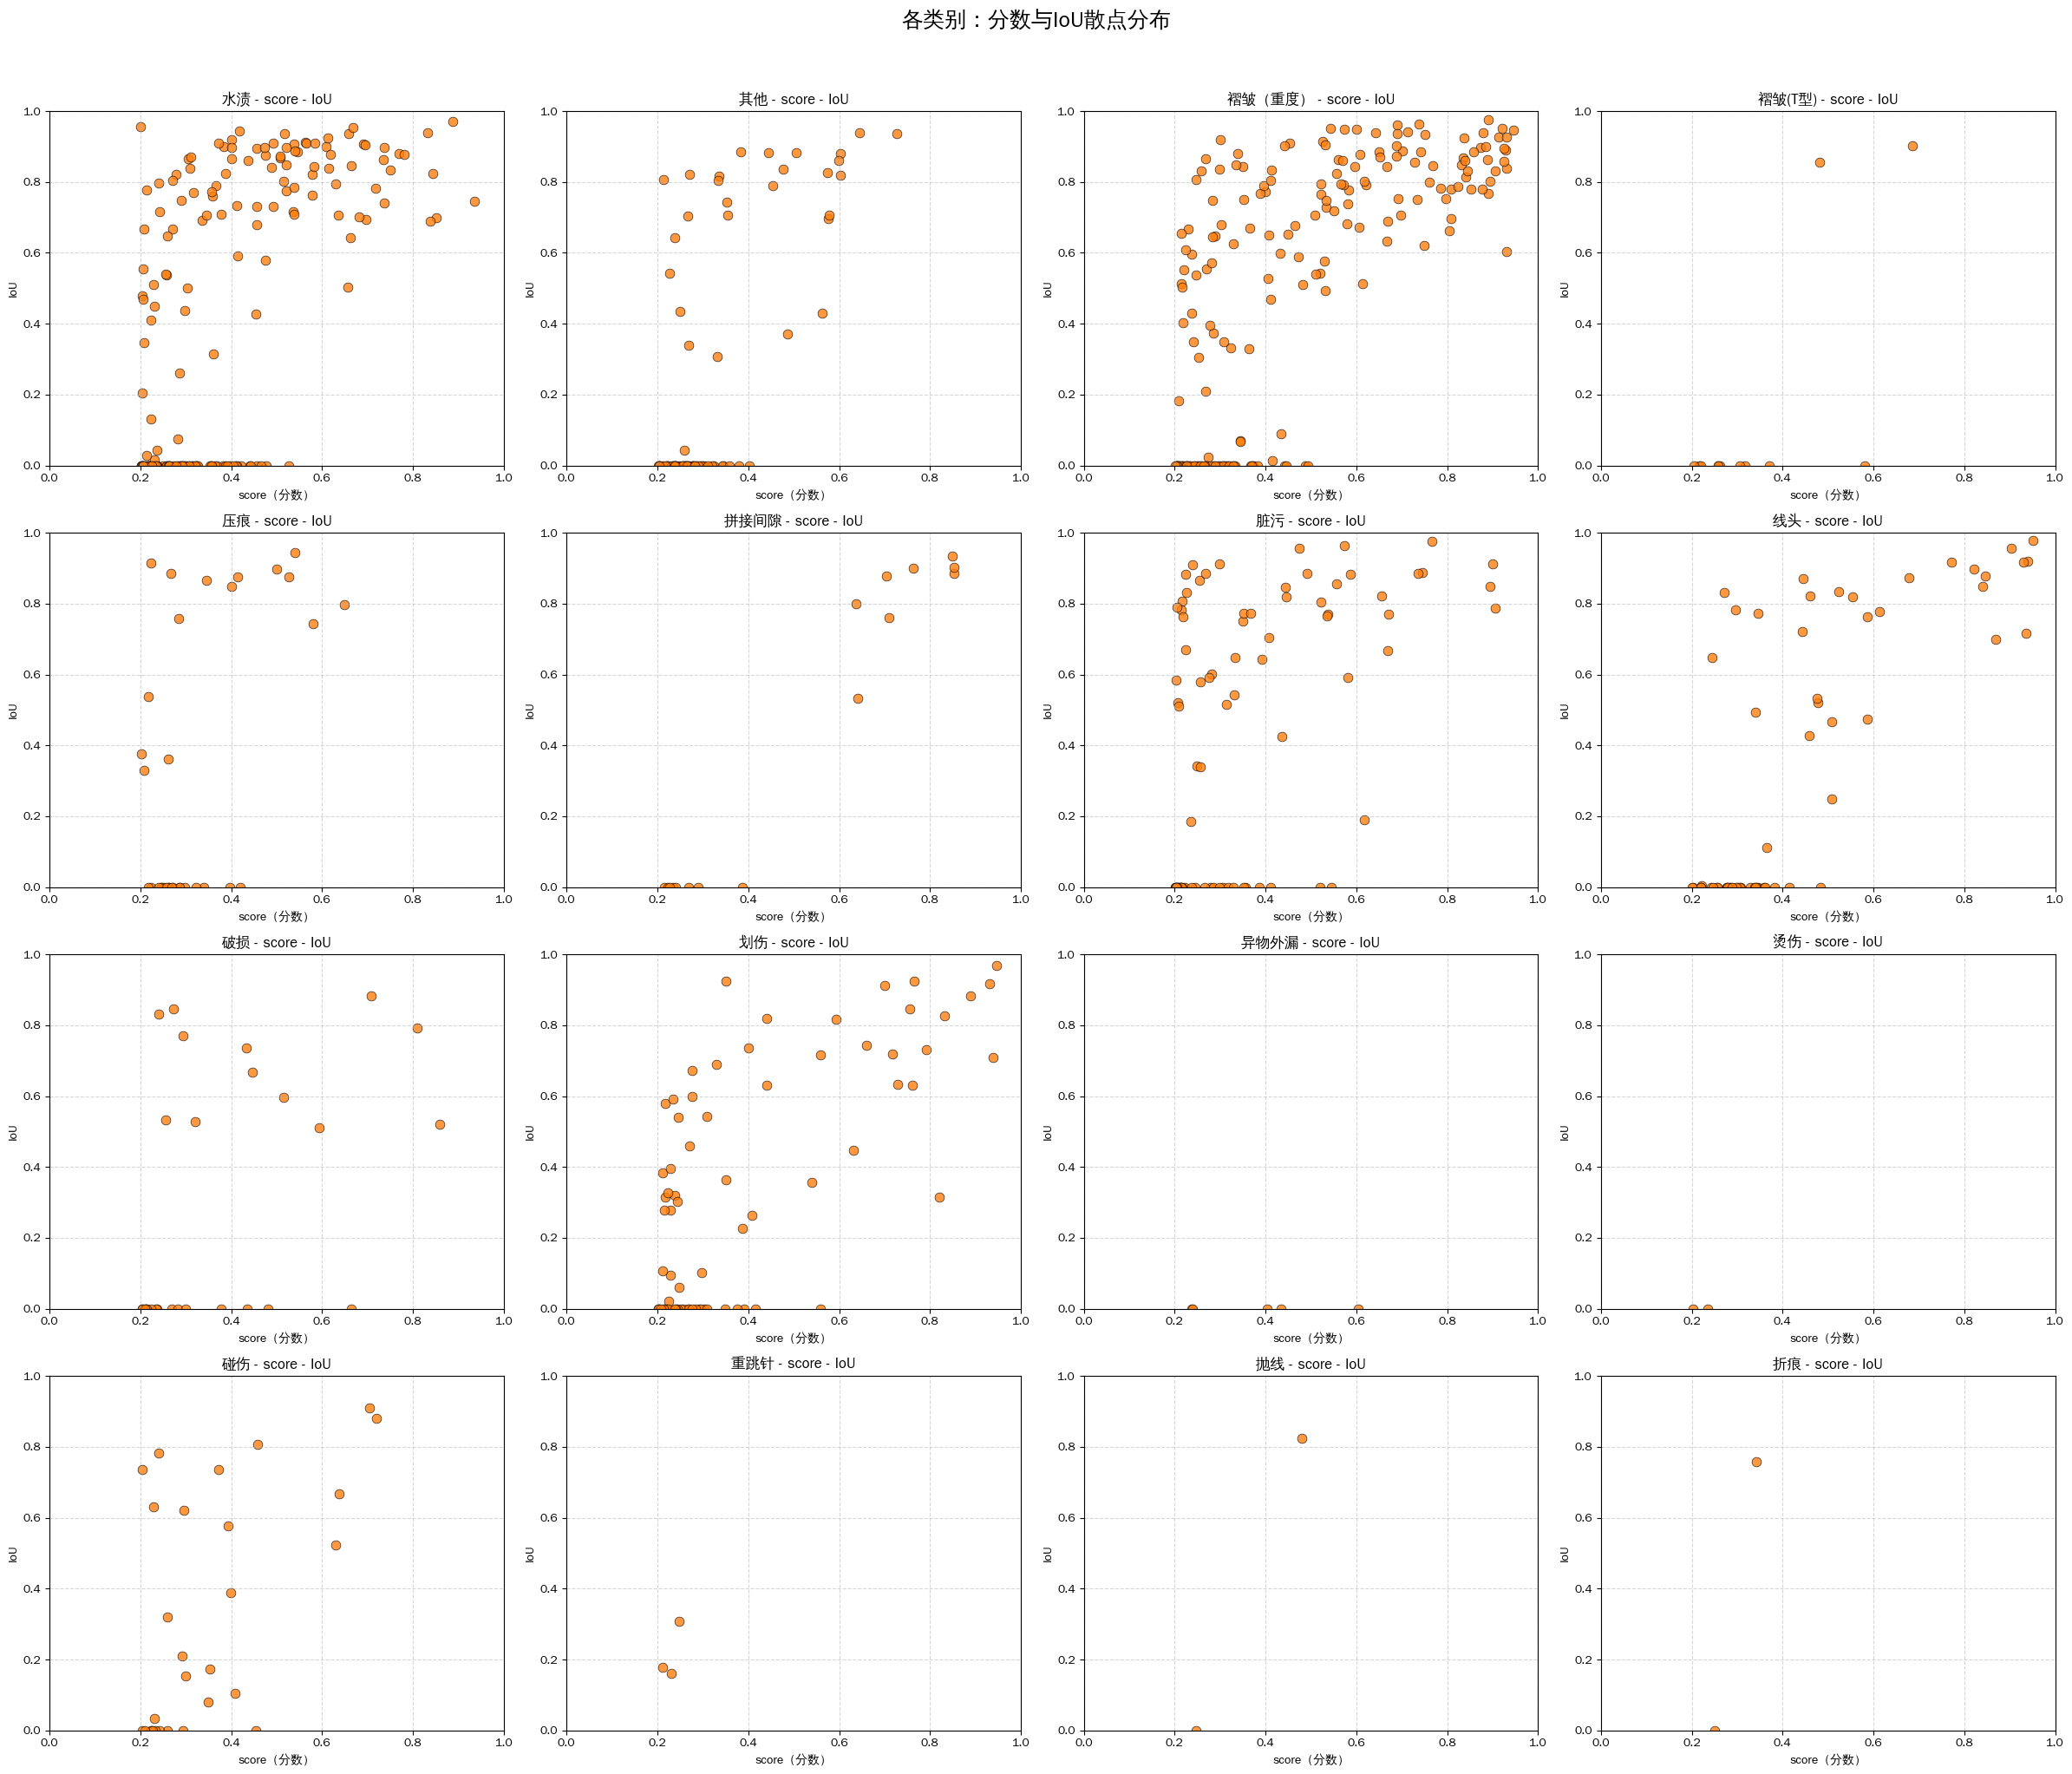

In [ ]:
def plot_score_iou_scatter(norm_bbox_df, n_cols=4):
    """
    绘制各类别的分数与IoU散点分布图。

    参数:
        norm_bbox_df: DataFrame，包含 'name'（类别名）、'score'（分数）、'iou'（IoU）等字段
        n_cols: 每行显示的子图数量，默认为4
    """
    categories = norm_bbox_df['name'].unique()
    n_cat = len(categories)
    n_rows = (n_cat + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), squeeze=False)

    for idx, cat in enumerate(categories):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        data = norm_bbox_df[norm_bbox_df['name'] == cat]
        ax.scatter(
            data['score'], data['iou'],
            alpha=0.8, s=60, edgecolors='k', linewidths=0.5, color='#ff7f0e'
        )
        ax.set_title(f"{cat} - score - IoU")
        ax.set_xlabel("score（分数）")
        ax.set_ylabel("IoU")
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.grid(True, linestyle='--', alpha=0.5)

    # 多余的子图关闭
    for i in range(n_cat, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        axes[row, col].axis('off')

    plt.suptitle("各类别：分数与IoU散点分布", fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

plot_score_iou_scatter(get_predict_annotations(cls_train_coco)['annotations'])

In [17]:
cls_train_coco['annotations']

,id_x,image_id,category_id,bbox,area,segmentation,transcription,iscrowd,source,score,...,id,license,file_name,height,width,date_captured,mask_null,interested_area,not_interested_area,iou
0,0,0,8,"[567.4458536585366, 1574.4624390243903, 49.451...",2297.260971,[[]],NaN,0,gt,0.578582,...,0,1,1756717183496__p_0002_f9f1d25c48db4b5086d68fa9...,2048.0,2046.0,n/a,False,[],[],0.821107
1,1,5,16,"[321.23926305138747, 971.2612906427289, 530.11...",164970.580057,[[]],NaN,0,gt,0.608206,...,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[],0.876555
2,2,5,16,"[1047.7115977073206, 796.7067049410758, 161.04...",37464.305244,[[]],NaN,0,gt,0.528962,...,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[],0.576731
3,3,7,8,"[1324.499797198969, 1664.161499040115, 6.56030...",65.058604,[[]],NaN,0,gt,0.335175,...,7,1,1756717181783__p_0031_4e002985ef7c4913a4524f7f...,2048.0,2046.0,n/a,False,[],[],0.691172
4,4,13,8,"[2994.802079555072, 1472.5003022609117, 579.97...",465749.661659,[[]],NaN,0,gt,0.608373,...,13,1,1756717174529__p_0018_4ee0e4f8ef5444b599c374ec...,4100.0,4096.0,n/a,False,[],[],0.899727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,784,510,2,"[1095.830078125, 1785.29736328125, 1302.235839...",791204.937500,NaN,NaN,0,predict,0.269988,...,510,1,1756716879769_50cbd5ef-bc52-4406-9e4c-d76cb515...,4096.0,4096.0,n/a,False,[],[],0.000000
1140,785,511,8,"[2437.838134765625, 858.6640014648438, 79.3574...",15488.002930,NaN,NaN,0,predict,0.838007,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.688635
1141,786,511,16,"[2444.3544921875, 1338.9090576171875, 885.2868...",414046.687500,NaN,NaN,0,predict,0.582011,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.738059
1142,787,511,16,"[2575.78125, 1664.7435302734375, 289.809814453...",61726.093750,NaN,NaN,0,predict,0.414127,...,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[],0.833976


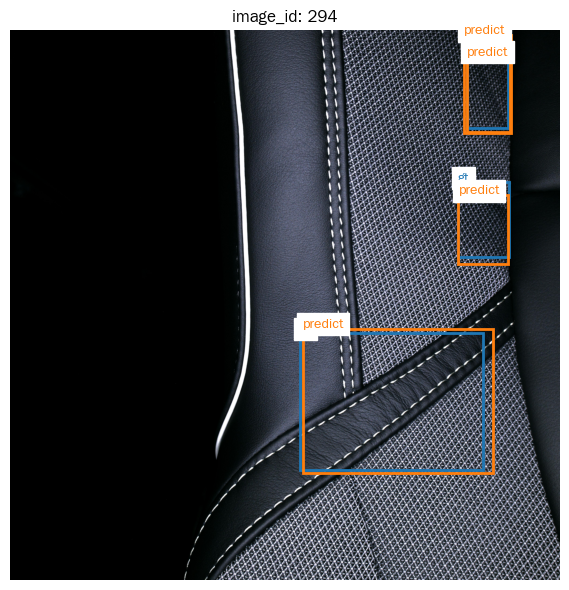

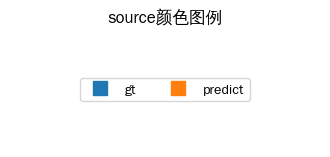

In [22]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# 这里df应为annotations，images_df为images
df = cls_train_coco['annotations']
images_df = cls_train_coco['images']
cat_df = cls_train_coco['categories']

# 获取所有类别名
all_categories = cat_df['name'].unique().tolist()

# 生成source到颜色的映射
if 'source' in df.columns:
    source_list = df['source'].dropna().unique().tolist()
    import itertools
    color_palette = plt.get_cmap('tab10').colors
    color_cycle = itertools.cycle(color_palette)
    source_color_map = {src: color for src, color in zip(source_list, color_cycle)}
else:
    source_color_map = {}

# 创建下拉菜单选择类别
category_selector = widgets.Dropdown(
    options=all_categories,
    value=all_categories[0],
    description='类别:',
    disabled=False,
)

# 用于存储当前类别下所有图片id
current_image_ids = []

def show_single_image(category_name, image_idx):
    clear_output(wait=True)
    display(widgets.HBox([category_selector, image_slider]))
    # 先找到该类别的category_id
    cat_row = cat_df[cat_df['name'] == category_name]
    if cat_row.empty:
        print(f"未找到类别“{category_name}”")
        return
    category_id = cat_row.iloc[0]['id'] if 'id' in cat_row.columns else cat_row.index[0]
    # 筛选出该类别的所有标注
    filtered = df[df['category_id'] == category_id]
    image_ids = filtered['image_id'].unique()
    global current_image_ids
    current_image_ids = image_ids
    print(f"共找到{len(image_ids)}张包含类别“{category_name}”的图片")
    if len(image_ids) == 0:
        print("没有图片可显示")
        return
    if image_idx >= len(image_ids):
        print("图片索引超出范围")
        return
    image_id = image_ids[image_idx]
    # 获取图片文件名
    img_row = images_df[images_df['id'] == image_id]
    if img_row.empty:
        print(f"未找到image_id={image_id}的图片")
        return
    img_path = os.path.join(train_dir, img_row.iloc[0]['file_name'])
    print(img_path)
    img = plt.imread(img_path)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(img)
    # 画出所有该类别的框
    for _, row in filtered[filtered['image_id'] == image_id].iterrows():
        bbox = row['bbox'] if 'bbox' in row else row['bb']
        # 颜色根据source列分配
        if 'source' in row and row['source'] in source_color_map:
            edgecolor = source_color_map[row['source']]
        else:
            edgecolor = 'r'
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2, edgecolor=edgecolor, facecolor='none'
        )
        ax.add_patch(rect)
        # 框上加source标签
        if 'source' in row:
            ax.text(
                bbox[0], bbox[1] - 5, str(row['source']),
                color=edgecolor, fontsize=10, backgroundcolor='white'
            )
        ax.set_title(f"image_id: {image_id}")
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    # 显示source颜色图例
    if source_color_map:
        import matplotlib.lines as mlines
        legend_handles = [
            mlines.Line2D([], [], color=col, marker='s', linestyle='None', markersize=10, label=str(src))
            for src, col in source_color_map.items()
        ]
        plt.figure(figsize=(min(12, len(source_color_map)*2), 1.5))
        plt.legend(handles=legend_handles, loc='center', ncol=len(source_color_map))
        plt.axis('off')
        plt.title("source颜色图例")
        plt.show()

def on_category_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # 更新图片id列表和滑杆范围
        cat_row = cat_df[cat_df['name'] == change['new']]
        if cat_row.empty:
            image_slider.max = 0
            image_slider.value = 0
            show_single_image(change['new'], 0)
            return
        category_id = cat_row.iloc[0]['id'] if 'id' in cat_row.columns else cat_row.index[0]
        filtered = df[df['category_id'] == category_id]
        image_ids = filtered['image_id'].unique()
        image_slider.max = max(0, len(image_ids)-1)
        image_slider.value = 0
        show_single_image(change['new'], 0)

def on_image_slider_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        show_single_image(category_selector.value, change['new'])

# 先获取初始类别的图片id数量
init_cat_row = cat_df[cat_df['name'] == category_selector.value]
if init_cat_row.empty:
    init_image_ids = []
else:
    init_category_id = init_cat_row.iloc[0]['id'] if 'id' in init_cat_row.columns else init_cat_row.index[0]
    init_image_ids = df[df['category_id'] == init_category_id]['image_id'].unique()

image_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=max(0, len(init_image_ids)-1),
    step=1,
    description='图片索引:',
    continuous_update=False,
    readout=True,
    readout_format='d'
)

category_selector.observe(on_category_change)
image_slider.observe(on_image_slider_change)

display(widgets.HBox([category_selector, image_slider]))
show_single_image(category_selector.value, image_slider.value)
